# Complete Electoral Bond Data 21-March-24

In [66]:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
partyWiseData = pd.read_csv('partywisedata.csv')
buyersData = pd.read_csv('purchaserdata.csv')

In [36]:
partyWiseData.sample()

,Sr No.,Date of Encashment,Bond Number,Name of the Political Party,Name of the Purchaser,Denominations,Account no. of Political Party,Pay Branch Code,Pay Teller
11046,2033,20-04-2019,TL10923,Bharatiya Janata Party,Ms Pearl Global Industries Ltd Form,1000000,*******8244,691,2511282


In [35]:
partyWiseData.shape

(20421, 9)

In [7]:
partyWiseData.rename(columns={'Date of \nEncashment': 'Date of Encashment'}, inplace=True)
partyWiseData.rename(columns={'Bond\nNumber': 'Bond Number'}, inplace=True)
partyWiseData.rename(columns={'Account no. of\nPolitical Party': 'Account no. of Political Party'}, inplace=True)
partyWiseData.rename(columns={'Pay Branch\nCode': 'Pay Branch Code'}, inplace=True)

In [8]:
buyersData.rename(columns={'Date of\nPurchase': 'Date of Purchase'}, inplace=True)
buyersData.rename(columns={'Bond\nNumber': 'Bond Number'}, inplace=True)

In [15]:
buyersData.sample()

,Sr No.,Reference No (URN),Journal Date,Date of Purchase,Date of Expiry,Bond Number,Name of the Purchaser,Name of the Political Party,Denominations,Issue Branch Code,Issue Teller,Status
480,12269,1.200000e+18,06-04-2023,06-04-2023,20-04-2023,OC11686,Avees Trading & Finance Pvt Ltd,"President, All India Congress Committee",10000000,1,5054982,Paid


In [16]:
buyersData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sr No.                       18871 non-null  int64  
 1   Reference No (URN)           18871 non-null  float64
 2   Journal Date                 18871 non-null  object 
 3   Date of Purchase             18871 non-null  object 
 4   Date of Expiry               18871 non-null  object 
 5   Bond Number                  18871 non-null  object 
 6   Name of the Purchaser        18871 non-null  object 
 7   Name of the Political Party  18741 non-null  object 
 8   Denominations                18871 non-null  int64  
 9   Issue Branch Code            18871 non-null  int64  
 10  Issue Teller                 18871 non-null  int64  
 11  Status                       18871 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.7+ MB


In [9]:
partyWiseData.info()
#from Name of the Purchaser 1680 data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Sr No.                          20421 non-null  int64         
 1   Date of Encashment              20421 non-null  datetime64[ns]
 2   Bond Number                     20421 non-null  object        
 3   Name of the Political Party     20421 non-null  object        
 4   Name of the Purchaser           18741 non-null  object        
 5   Denominations                   20421 non-null  int64         
 6   Account no. of Political Party  20421 non-null  object        
 7   Pay Branch Code                 20421 non-null  int64         
 8   Pay Teller                      20421 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.4+ MB


In [8]:
#Convert data type of 'Date of Encashment' from string to datetime
partyWiseData['Date of Encashment'] = pd.to_datetime(partyWiseData['Date of Encashment'],format="%d-%m-%Y")

**How many electoral bonds were purchased in total?**

In [37]:
total_buyers = pd.DataFrame(buyersData['Bond Number'])
print('Total number of electoral bonds purchased:', len(total_buyers))

Total number of electoral bonds purchased: 18871


**total amount encashed via the electoral bonds?**

In [42]:
total_encashed = pd.DataFrame(partyWiseData['Bond Number'])
print('Total number of electoral bonds encashed:', len(total_encashed))

Total number of electoral bonds encashed: 20421


**how many electoral bonds expired?**

In [53]:
exp = buyersData['Status'].value_counts()
print('Total Expired Bont Count is:',exp['Expired'])

Total Expired Bont Count is: 130


**How many bonds are encashed but their purchaser name is not disclosed by SBI?**

In [69]:
Na_purchaers = partyWiseData[partyWiseData['Name of the Purchaser'].isnull()]
print(f'{len(Na_purchaers)}, bonds are encashed but their purchaser name is not disclosed by SBI')

1680, bonds are encashed but their purchaser name is not disclosed by SBI


**expired electrol bond amount?**

In [71]:
exp_amount = buyersData.groupby('Status')['Denominations'].sum()
print('Total Expired Bond Count is:',exp_amount['Expired'])

Total Expired Bond Count is: 96349000


**total amount associated with undisclosed purchases, and which recipient received the highest number of such undisclosed purchases?**

In [78]:
#used previousy created variable Na_purchaers
pd.DataFrame(Na_purchaers.groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False))

,Denominations
Name of the Political Party,
Bharatiya Janata Party,4663100000
"President, All India Congress Committee",707710000
Bharat Rashtra Samithi,235500000
All India Trinamool Congress,170100000
Ysr Congress Party (Yuvajana Sramika Rythu Congress Party),82500000
Telugu Desam Party,73000000
Dravida Munnetra Kazhagam (Dmk),70000000
Shivsena,69300000
All India Anna Dravida Munnetra Kazhagam,60500000


**What proportion of the total purchased electoral bonds is represented by the expired bonds?**

In [87]:
total_fund = buyersData['Denominations'].sum()
expired_fund = buyersData[buyersData['Status'] == 'Expired']['Denominations'].sum()
proportion_expired = expired_fund / total_fund * 100
print("Proportion of total purchased electoral bonds represented by expired bonds: {:.2f}%".format(proportion_expired))

Proportion of total purchased electoral bonds represented by expired bonds: 0.08%


**Name of the Political Parties With Highest Denominations**

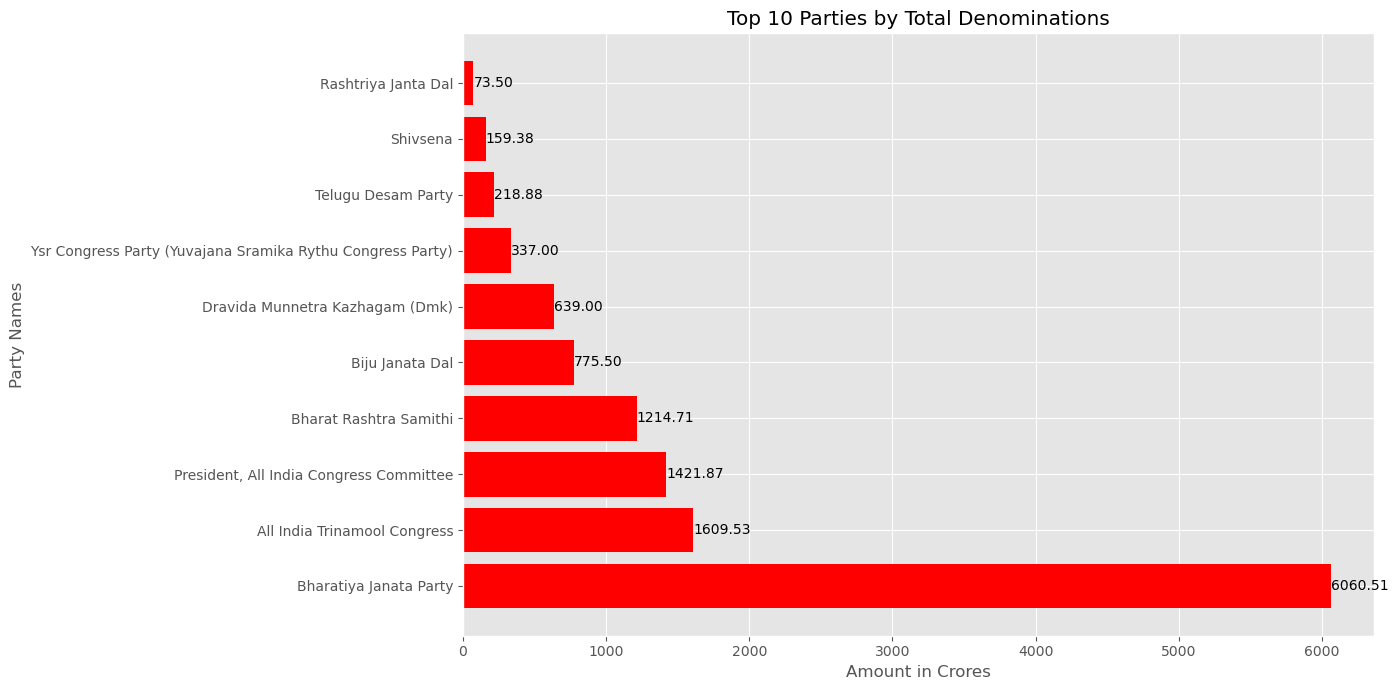

In [75]:
x =partyWiseData.groupby('Name of the Political Party')['Denominations'].sum()
a = x.nlargest(10)
x1 = a.index
y1 = a.values / 10000000

plt.figure(figsize=(14,7))
bars = plt.barh(x1, y1, color='red')
for bar, value in zip(bars, y1):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(value),
             va='center', ha='left', fontsize=10, color='black')
plt.xlabel('Amount in Crores')
plt.ylabel('Party Names')
plt.title('Top 10 Parties by Total Denominations')
plt.tight_layout()
plt.show()

**Are there specific "Pay Branch Codes" where the BJP encashes a significantly higher number of bonds?**

In [111]:
bjp = partyWiseData[partyWiseData['Name of the Political Party'] == 'Bharatiya Janata Party']['Pay Branch Code'].value_counts()
print('BJP Encashes more from this branch code: ', bjp.idxmax())

BJP Encashes more from this branch code:  691


In [90]:
partyWiseData['Pay Branch Code'].value_counts().reset_index()

,Pay Branch Code,count
0,691,12139
1,1,3299
2,847,2597
3,41,821
4,800,687
5,300,476
6,152,168
7,232,60
8,125,46
9,167,45


**On which date most encashment happens?**

In [80]:
partyWiseData['Date of Encashment'].value_counts().head(10)

Date of Encashment
18-04-2019    596
12-04-2019    517
10-05-2019    512
13-07-2023    497
20-04-2019    493
17-04-2023    449
12-04-2021    417
13-10-2023    401
16-04-2019    392
10-01-2022    391
Name: count, dtype: int64

**Are there any buyers who stand out because they buy a lot of bonds?**

In [117]:
buyersData.groupby('Name of the Purchaser')['Denominations'].sum().sort_values(ascending=False).head()

Name of the Purchaser
Future Gaming And Hotel Services Private Limited    13680000000
Megha Engineering & Infrastructures Limited          9660000000
Qwik supply chain private limited                    4100000000
Haldia Energy Limited                                3770000000
Vedanta Limited                                      3756500000
Name: Denominations, dtype: int64

**Describe the Future Gaming Donation**

In [123]:
buyersData[buyersData['Name of the Purchaser'] == 'Future Gaming And Hotel Services Private Limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)

Name of the Political Party
All India Trinamool Congress                                  5420000000
Dravida Munnetra Kazhagam (Dmk)                               5030000000
Ysr Congress Party (Yuvajana Sramika Rythu Congress Party)    1540000000
Bharatiya Janata Party                                        1000000000
President, All India Congress Committee                        500000000
Sikkim Krantikari Morcha                                       110000000
Sikkim Democratic Front                                         50000000
Name: Denominations, dtype: int64

**Visual Representation of Fund Distributions**

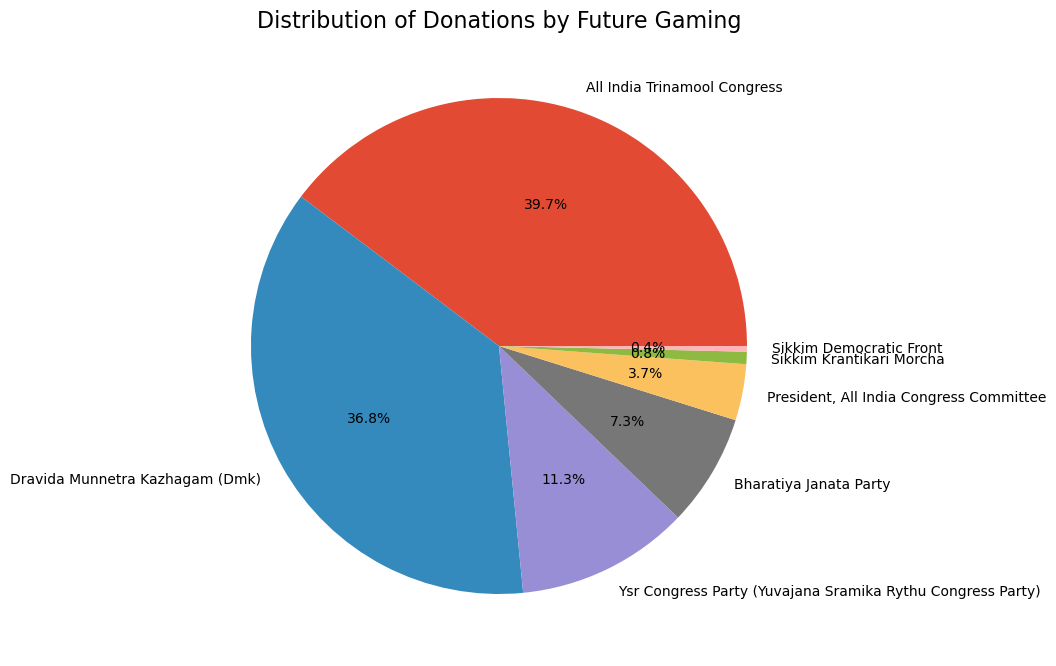

In [190]:
grouped_data = buyersData[buyersData['Name of the Purchaser'] == 'Future Gaming And Hotel Services Private Limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,15))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Distribution of Donations by Future Gaming",loc='center',fontsize=16)
for label, amount in grouped_data.items():
    plt.annotate(f"{label}: {amount}",
                 xy=(0,amount/2),
                 ha='center',)

plt.show()


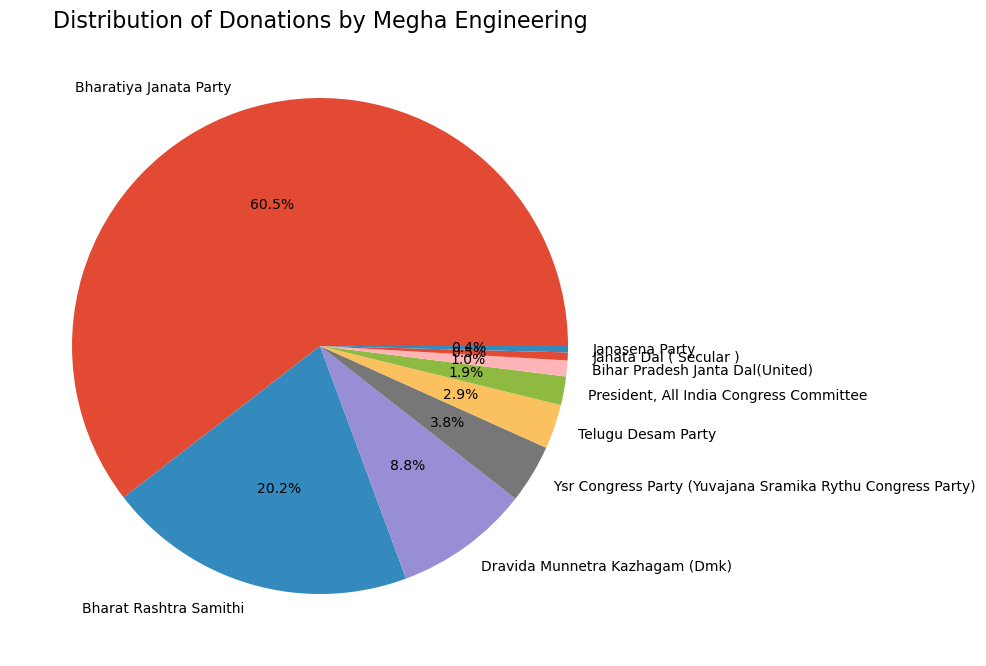

In [191]:
grouped_data = buyersData[buyersData['Name of the Purchaser'] == 'Megha Engineering & Infrastructures Limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,15))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Distribution of Donations by Megha Engineering",loc='center',fontsize=16)
for label, amount in grouped_data.items():
    plt.annotate(f"{label}: {amount}",
                 xy=(0,amount/2),
                 ha='center')

plt.show()

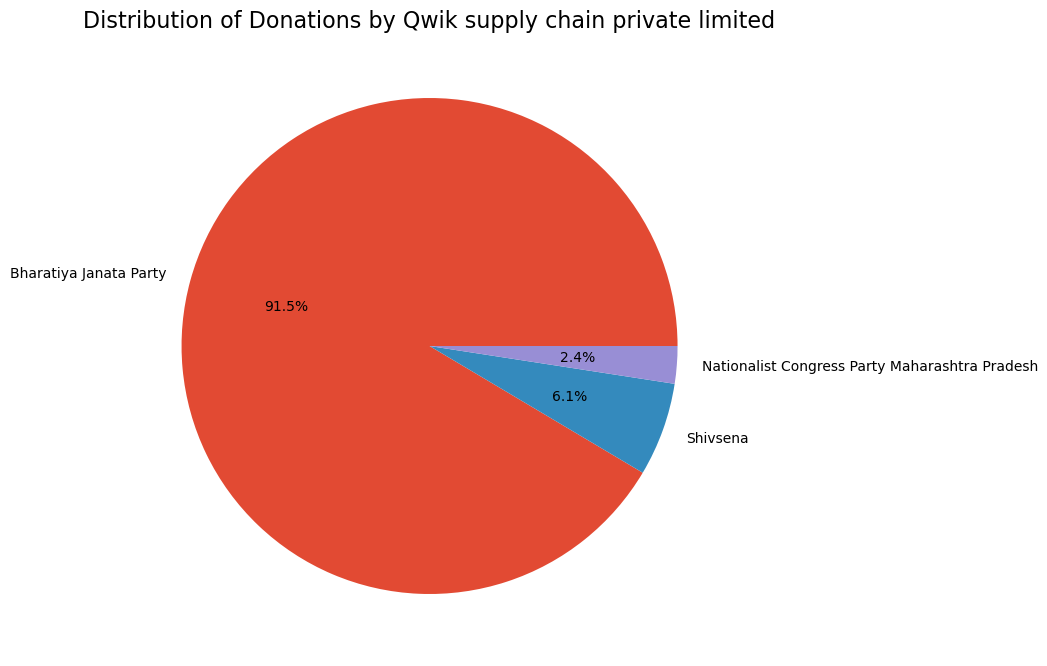

In [189]:
grouped_data = buyersData[buyersData['Name of the Purchaser'] == 'Qwik supply chain private limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,15))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Distribution of Donations by Qwik supply chain private limited",loc='center',fontsize=16)
for label, amount in grouped_data.items():
    plt.annotate(f"{label}: {amount}",
                 xy=(0,amount/2),
                 ha='center',)

plt.show()

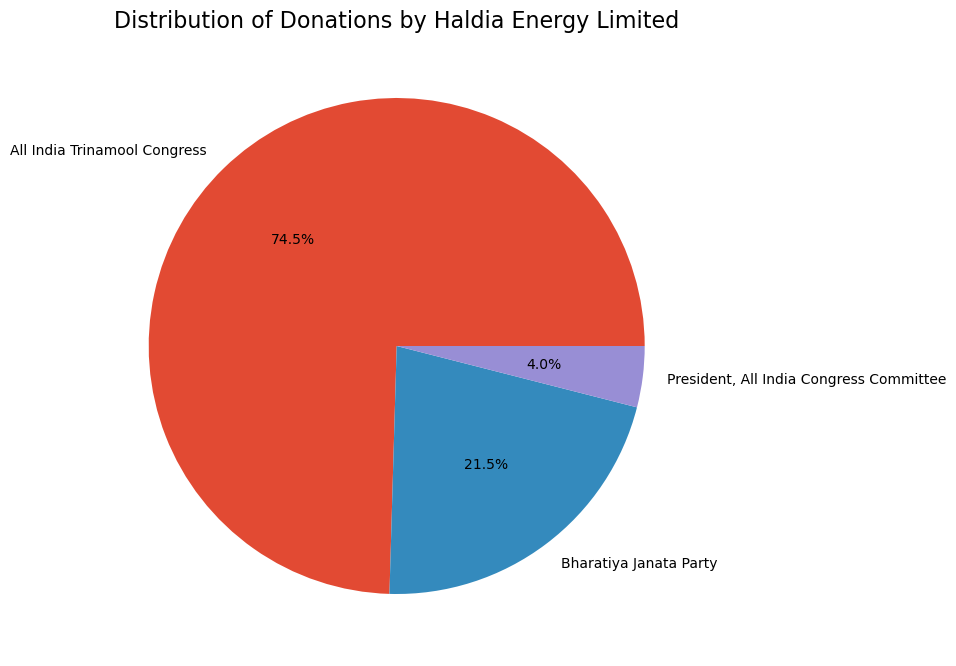

In [164]:
grouped_data = buyersData[buyersData['Name of the Purchaser'] == 'Haldia Energy Limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,15))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Distribution of Donations by Haldia Energy Limited", loc='center',fontsize=16)
for label, amount in grouped_data.items():
    plt.annotate(f"{label}: {amount}",
                 xy=(0,amount/2),
                 ha='center',)

plt.show()

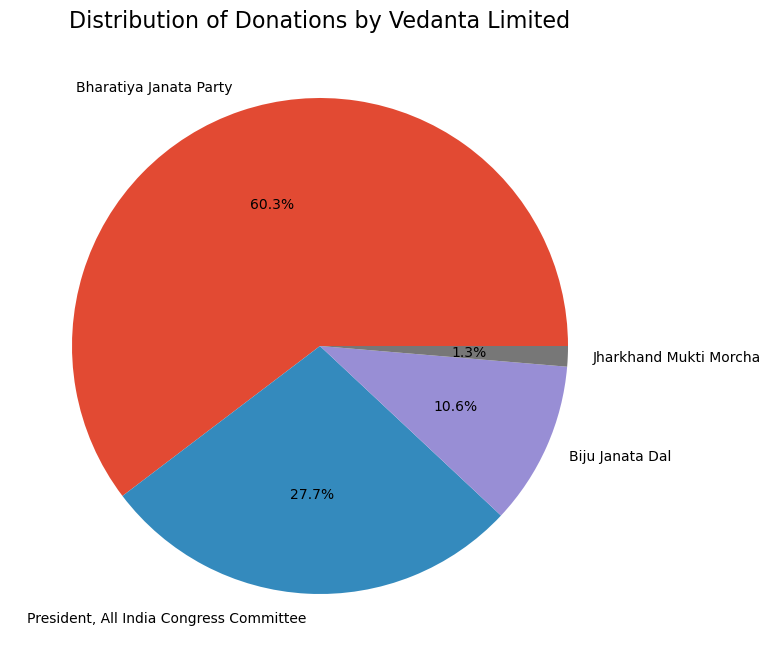

In [179]:
grouped_data = buyersData[buyersData['Name of the Purchaser'] == 'Vedanta Limited'].groupby('Name of the Political Party')['Denominations'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,15))
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Distribution of Donations by Vedanta Limited", loc='center',fontsize=16)
for label, amount in grouped_data.items():
    plt.annotate(f"{label}: {amount}",
                 xy=(0,amount/2),
                 ha='center')

plt.show()